# 

In [186]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam, schedules
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [187]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [188]:
X_train = x_train.reshape(50000, 32, 32, 3)
X_test = x_test.reshape(10000, 32, 32, 3)

X_train = X_train.astype('float32')         
X_test = X_test.astype('float32')

X_train /= 255                              
X_test /= 255

In [189]:
nb_classes = 10

Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

print(f"Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

Y_train: (50000, 10), Y_test: (10000, 10)


In [190]:
def plot_images(x, X, y):
    # Define number of rows & columns
    num_row = 2
    num_col = 8
    num = num_row * num_col
    
    # Plot before
    print('BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
    for i in range(num):
        ax = axes1[i // num_col, i % num_col]
        ax.imshow(x[i])
        ax.set_title('Label: {}'.format(y[i]))
        ax.axis('off')
    plt.show()
    
    # Plot after
    print('AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
    for X_aug, Y_aug in datagen.flow(X, y, batch_size=num, shuffle=False):
        for i in range(0, num):
            ax = axes2[i // num_col, i % num_col]
            ax.imshow(X_aug[i])
            ax.set_title('Label: {}'.format(int(Y_aug[i])))
            ax.axis('off')
        break
    plt.show()

BEFORE:



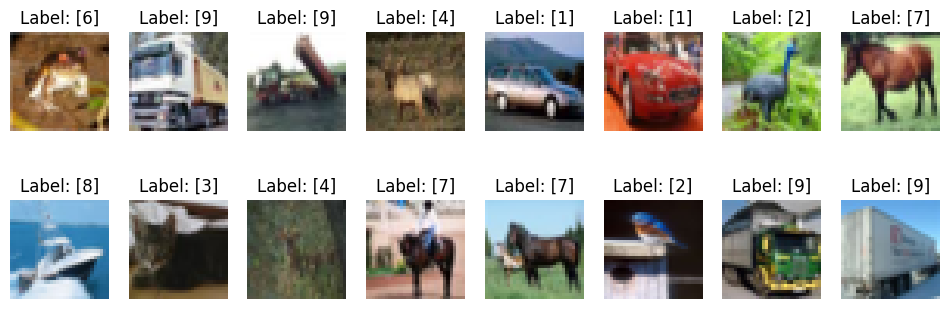

AFTER:



C:\Users\peter\AppData\Local\Temp\ipykernel_18804\2622081334.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title('Label: {}'.format(int(Y_aug[i])))


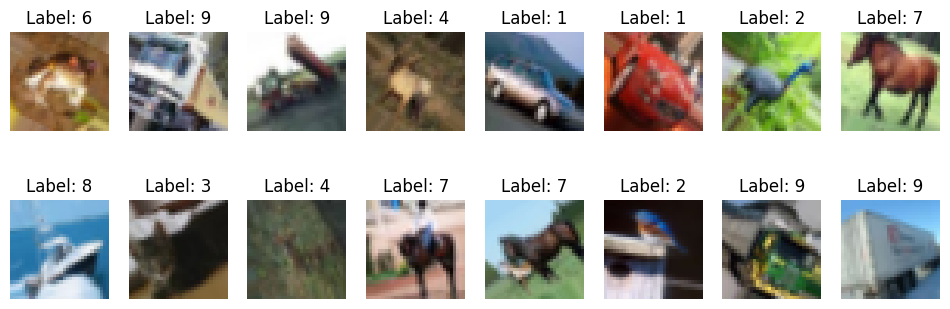

In [191]:
datagen = ImageDataGenerator(rotation_range=40)
datagen.fit(X_train)

plot_images(x_train, X_train, y_train)

BEFORE:



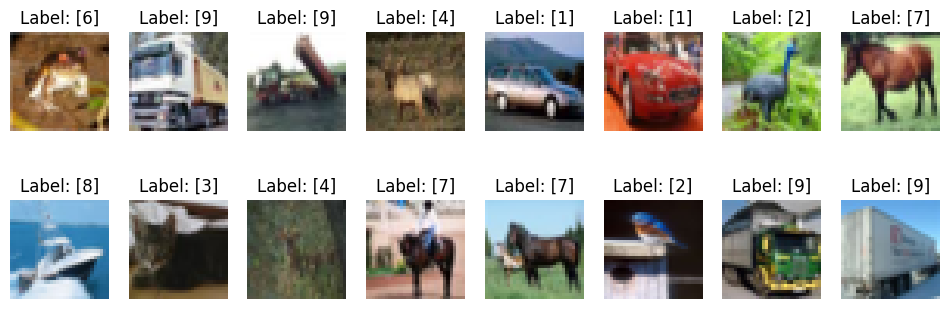

AFTER:



C:\Users\peter\AppData\Local\Temp\ipykernel_18804\2622081334.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title('Label: {}'.format(int(Y_aug[i])))


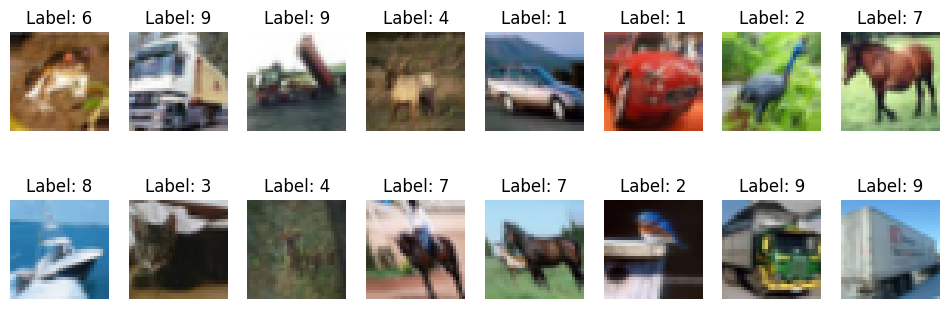

In [192]:
datagen = ImageDataGenerator(shear_range=20)
datagen.fit(X_train)

plot_images(x_train, X_train, y_train)

In [193]:
new_data = ImageDataGenerator(rotation_range=40, shear_range=20)
datagen.fit(X_test)

X_test_augmented, Y_test_augmented = next(datagen.flow(X_test, Y_test, batch_size=X_test.shape[0], shuffle=False))

In [194]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu') )

model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu') )

model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [195]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 activation_225 (Activation  (None, 30, 30, 32)        0         
 )                                                               
                                                                 
 conv2d_151 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 activation_226 (Activation  (None, 28, 28, 32)        0         
 )                                                               
                                                                 
 conv2d_152 (Conv2D)         (None, 26, 26, 32)        9248      
                                                                 
 activation_227 (Activation  (None, 26, 26, 32)      

In [196]:
def plot_overfitting(max_epochs):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
    model.add(Activation('relu') )

    model.add(Conv2D(filters=32, kernel_size=(3, 3)))
    model.add(Activation('relu') )

    model.add(Conv2D(filters=32, kernel_size=(3, 3)))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3)))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=64, kernel_size=(3, 3)))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3)))
    model.add(Activation('relu'))

    model.add(Flatten())

    model.add(Dense(500))
    model.add(Activation('relu'))

    model.add(Dense(300))
    model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # train_acc = []
    # test_acc = []
    # for epoch in range(1, max_epochs + 1):
    model.fit(X_train, Y_train, batch_size=128, epochs=max_epochs, validation_data=(X_test, Y_test), verbose=0)
    _, accuracy1 = model.evaluate(X_train, Y_train, verbose=0)
    _, accuracy2 = model.evaluate(X_test, Y_test, verbose=0)
    # train_acc.append(accuracy1)
    # test_acc.append(accuracy2)
    return [accuracy1, accuracy2]
    
    # plt.plot(range(1, max_epochs + 1), train_acc, label='Training Accuracy')
    # plt.plot(range(1, max_epochs + 1), test_acc, label='Testing Accuracy')
    # plt.show()

train_acc = []
test_acc = []
max_epochs = 15

for x in range(1, max_epochs + 1):
    train_acc.append(plot_overfitting(x)[0])
    test_acc.append(plot_overfitting(x)[1])

plt.plot(range(1, max_epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, max_epochs + 1), test_acc, label='Testing Accuracy')
plt.show()

In [ ]:
# model.fit(X_train, Y_train, batch_size = 128, epochs=4, verbose=1, validation_split = 0.2, validation_steps=12000//128)

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 7ms/step - loss: 2.3040 - accuracy: 0.0977
Test loss: 2.3040
Test accuracy: 0.0977


In [ ]:
datagen.fit(X_test)
X_test_augmented, Y_test_augmented = next(datagen.flow(X_test, Y_test, batch_size=10_000))

In [ ]:
loss, accuracy = model.evaluate(X_test_augmented, Y_test_augmented)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 6ms/step - loss: 2.3040 - accuracy: 0.0995
Test loss: 2.3040
Test accuracy: 0.0995
